In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/electronics_ratings.csv')

print("Rating Range:", df['rating'].min(), "to", df['rating'].max())

Rating Range: 1 to 5


In [2]:
total_users = df['userId'].nunique()
total_items = df['productId'].nunique()
print(f"Total Users: {total_users}, Total Items: {total_items}")

ratings_per_product = df['productId'].value_counts()
print("Ratings per Product:\n", ratings_per_product.head())

Total Users: 100, Total Items: 50
Ratings per Product:
 productId
P040    27
P029    27
P037    25
P034    25
P025    23
Name: count, dtype: int64


In [3]:
active_users = df['userId'].unique()[:3]
U1, U2, U3 = active_users
print(f"Active Users: {U1}, {U2}, {U3}")

Active Users: U003, U074, U016


In [4]:
target_items = df['productId'].unique()[:2]
I1, I2 = target_items
print(f"Target Items: {I1}, {I2}")

Target Items: P034, P006


In [5]:
def co_ratings(user, df):
    user_items = set(df[df['userId'] == user]['productId'])
    return df[df['productId'].isin(user_items)]['userId'].nunique(), len(user_items)

print("Co-ratings:")
print(f"U1: {co_ratings(U1, df)}, U2: {co_ratings(U2, df)}, U3: {co_ratings(U3, df)}")

Co-ratings:
U1: (88, 10), U2: (80, 9), U3: (85, 11)


In [6]:
common_users_list = []
for user in [U1, U2, U3]:
    user_items = set(df[df['userId'] == user]['productId'])
    for other_user in df['userId'].unique():
        if user != other_user:
            common_count = len(user_items & set(df[df['userId'] == other_user]['productId']))
            common_users_list.append([common_count, other_user])

common_users_list = sorted(common_users_list, key=lambda x: x[0], reverse=True)
print("Top Common Users:", common_users_list[:5])

Top Common Users: [[6, 'U052'], [6, 'U019'], [5, 'U001'], [5, 'U023'], [5, 'U017']]


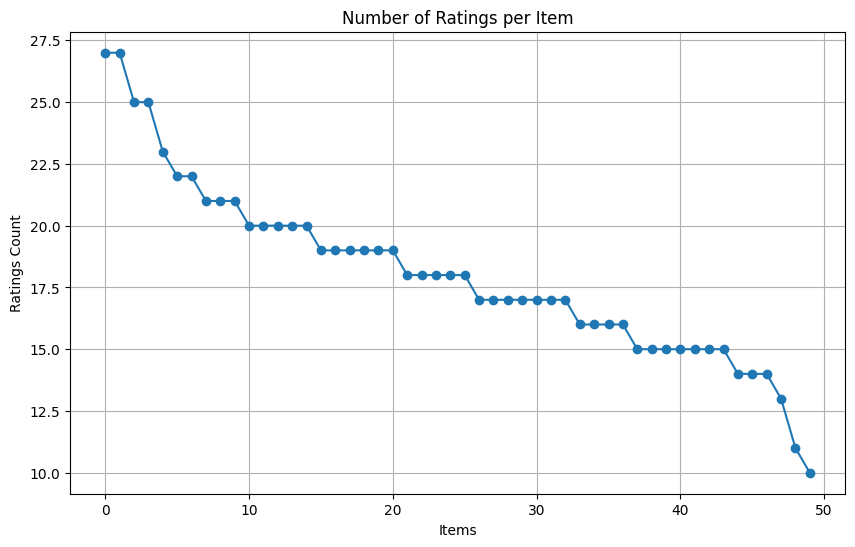

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_product.values, marker='o')
plt.title("Number of Ratings per Item")
plt.xlabel("Items")
plt.ylabel("Ratings Count")
plt.grid(True)
plt.show()

In [8]:
def calculate_threshold(user, df, percentage):
    user_items = set(df[df['userId'] == user]['productId'])
    return sum(1 for other_user in df['userId'].unique()
               if user != other_user and
               len(user_items & set(df[df['userId'] == other_user]['productId'])) / len(user_items) >= percentage)

print("Threshold β:")
print(f"U1: {calculate_threshold(U1, df, 0.3)}, U2: {calculate_threshold(U2, df, 0.3)}, U3: {calculate_threshold(U3, df, 0.3)}")

Threshold β:
U1: 31, U2: 14, U3: 13


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

user_item_matrix = df.pivot_table(index='userId', columns='productId', values='rating', fill_value=0)

cosine_sim = cosine_similarity(user_item_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

In [10]:
def get_top_closest_users(active_user, similarity_matrix, top_percent=0.2):
    user_similarities = similarity_matrix[active_user].drop(active_user)
    return user_similarities.nlargest(int(len(user_similarities) * top_percent))

top_users_U1 = get_top_closest_users(U1, cosine_sim_df)
top_users_U2 = get_top_closest_users(U2, cosine_sim_df)
top_users_U3 = get_top_closest_users(U3, cosine_sim_df)

print(f"Top Closest Users for U1:\n{top_users_U1}")
print(f"Top Closest Users for U2:\n{top_users_U2}")
print(f"Top Closest Users for U3:\n{top_users_U3}")

Top Closest Users for U1:
userId
U052    0.576865
U016    0.498782
U001    0.463790
U031    0.441497
U039    0.363186
U023    0.357599
U099    0.353396
U065    0.352804
U017    0.350016
U054    0.348452
U011    0.339865
U015    0.329795
U051    0.324675
U086    0.320940
U069    0.316492
U004    0.310661
U071    0.303703
U081    0.302058
U038    0.293387
Name: U003, dtype: float64
Top Closest Users for U2:
userId
U002    0.547695
U019    0.391397
U064    0.349548
U007    0.343100
U057    0.330645
U059    0.327957
U094    0.326732
U088    0.319642
U025    0.303822
U087    0.276139
U003    0.270640
U098    0.266880
U033    0.266149
U090    0.261740
U022    0.251832
U062    0.251753
U023    0.248797
U047    0.235945
U042    0.228387
Name: U074, dtype: float64
Top Closest Users for U3:
userId
U031    0.554605
U037    0.528932
U003    0.498782
U051    0.448640
U091    0.447774
U036    0.428117
U067    0.421991
U049    0.402920
U039    0.397573
U061    0.394495
U015    0.390199
U034    0.3762